In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [5]:
# percent NaN

100 * df.isnull().sum() / len(df)

PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 81, dtype: float64

In [6]:
def percent_missing(nulls):

    nan = 100 * nulls.isnull().sum() / len(nulls)
    percent_nan = nan[nan>0].sort_values()

    return percent_nan

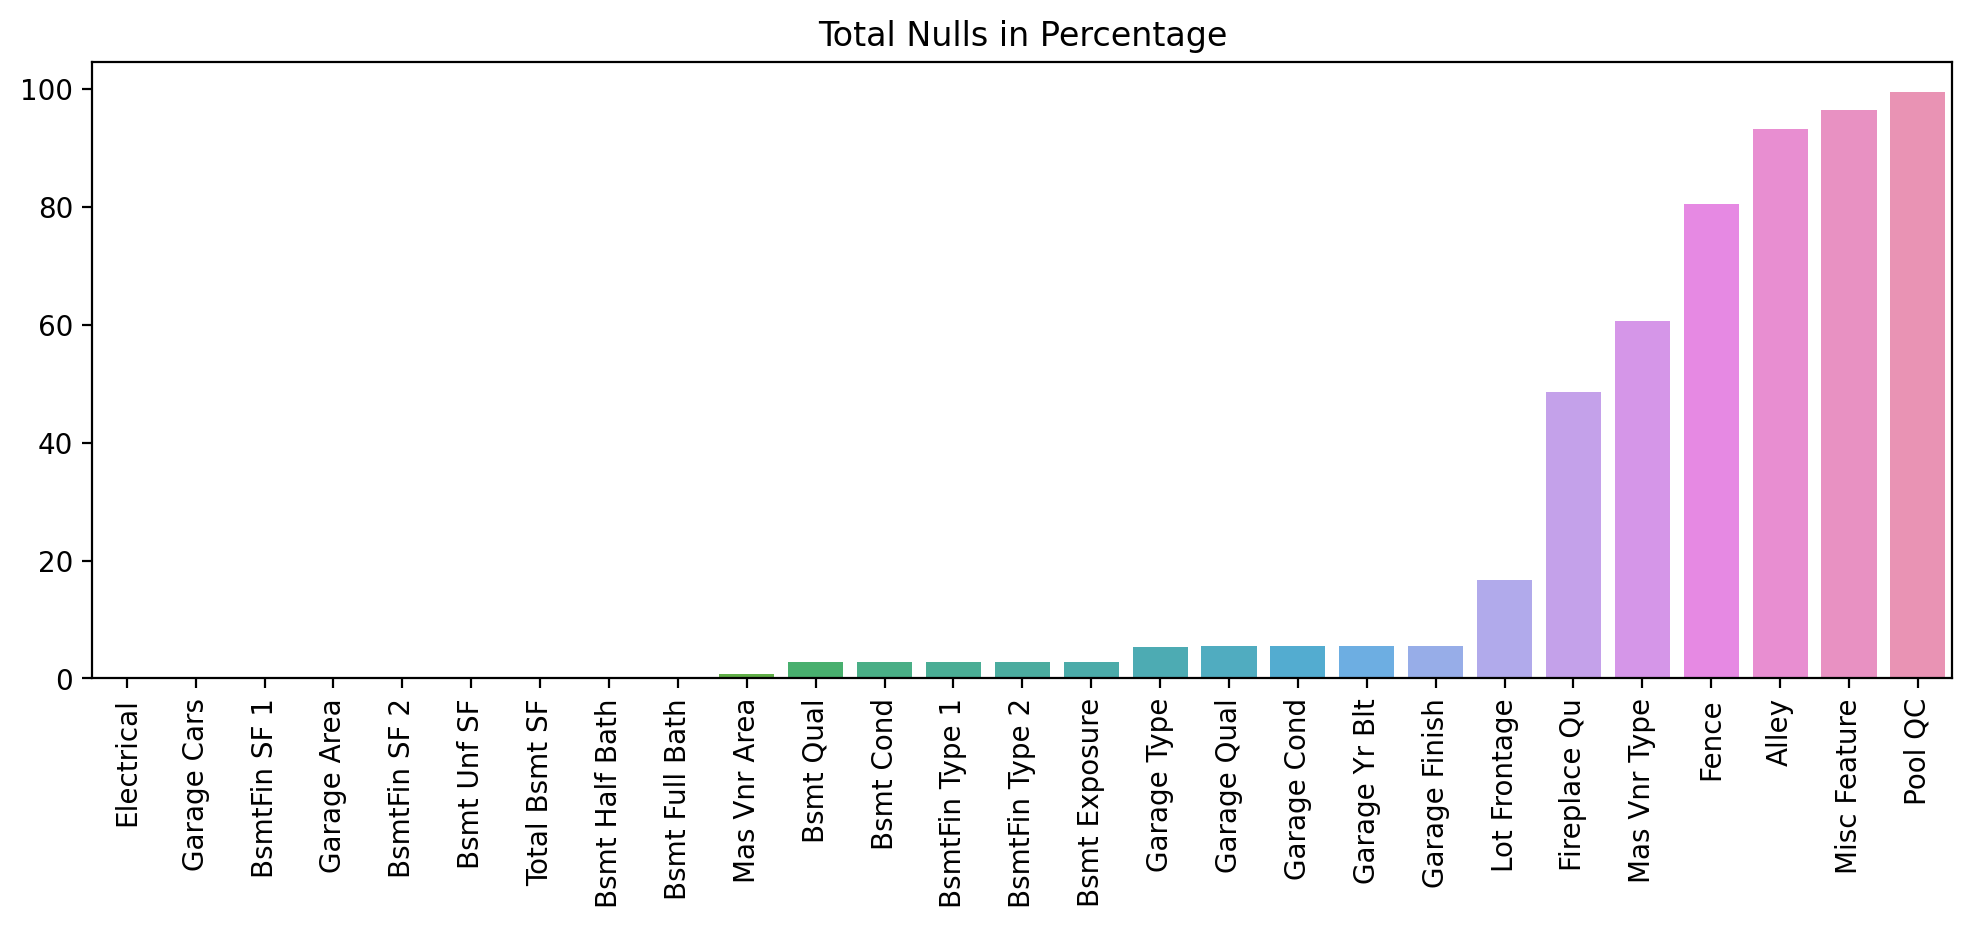

In [7]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_missing(df).index,y=percent_missing(df).values)
plt.title("Total Nulls in Percentage")
plt.xticks(rotation=90);

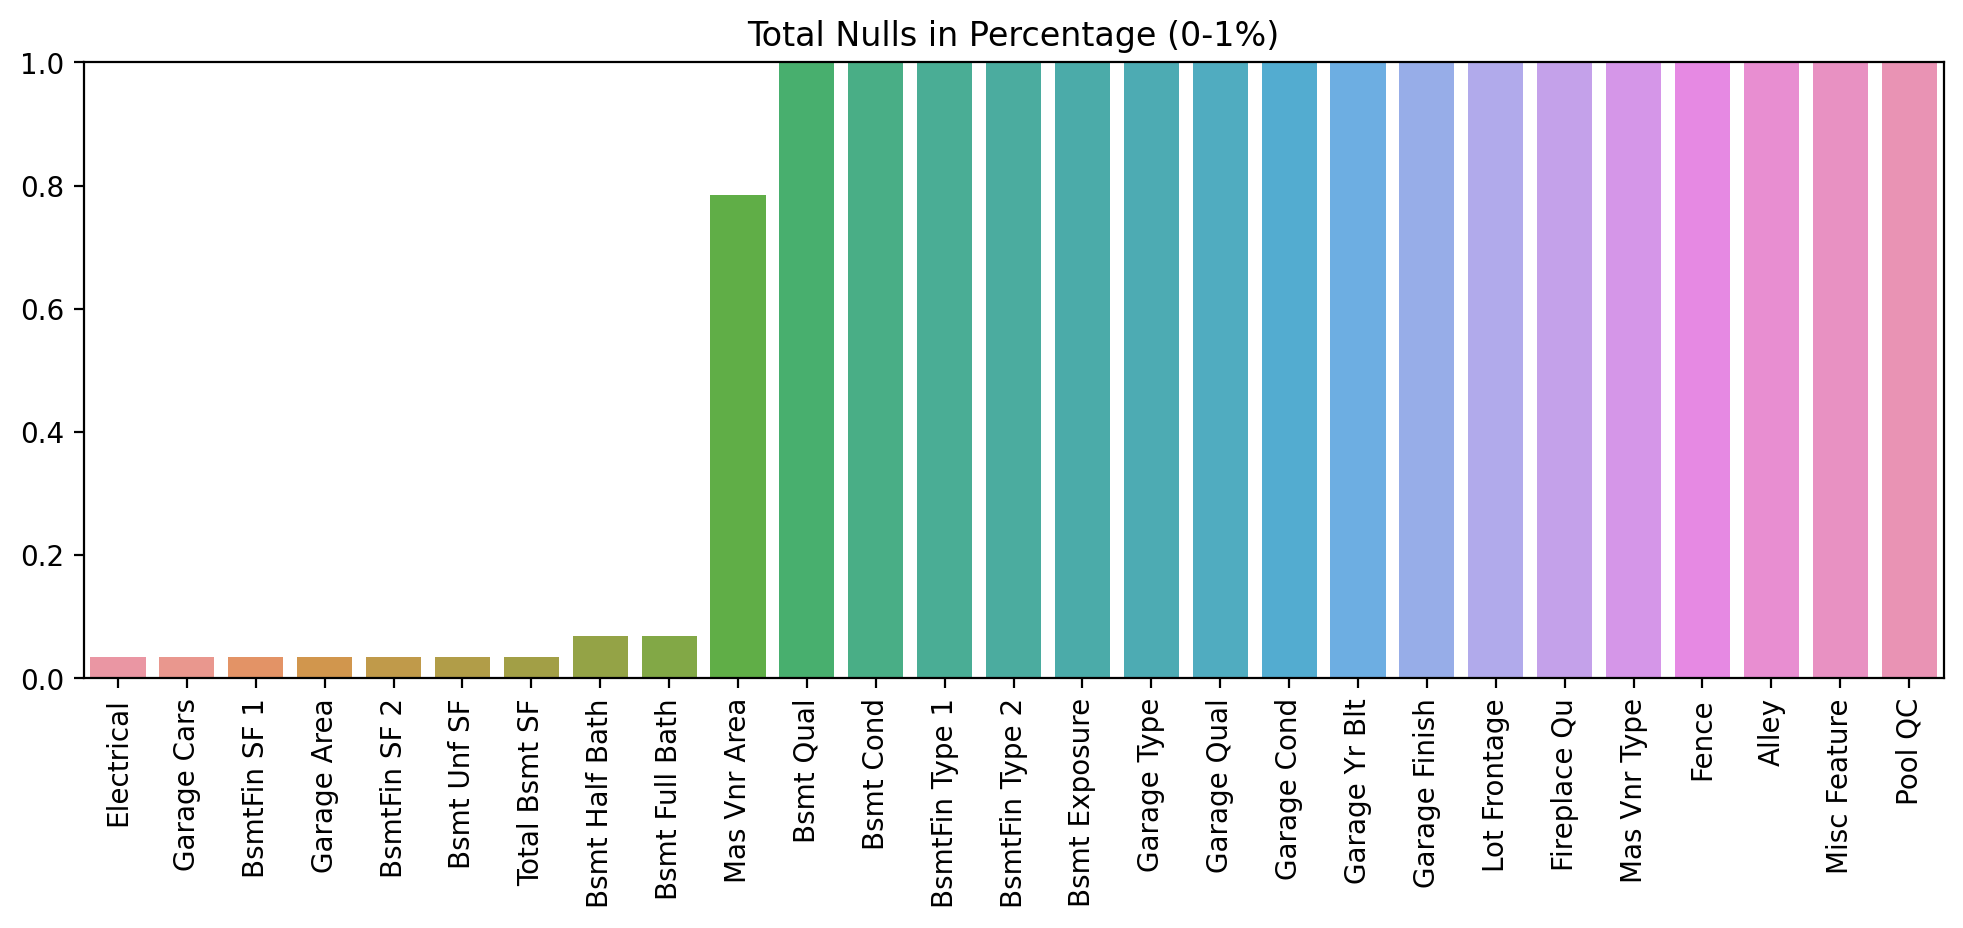

In [8]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_missing(df).index,y=percent_missing(df).values)
plt.title("Total Nulls in Percentage (0-1%)")
plt.xticks(rotation=90)
plt.ylim(0,1);

In [9]:
df[df["Electrical"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [10]:
df[df["Garage Cars"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


#### Assuming basements Null are the ones who doesn't have a basement.

In [11]:
bsmt_num = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num] = df[bsmt_num].fillna(0)

In [12]:
bsmt_str=  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str] = df[bsmt_str].fillna('None')

In [13]:
percent_nan = percent_missing(df)

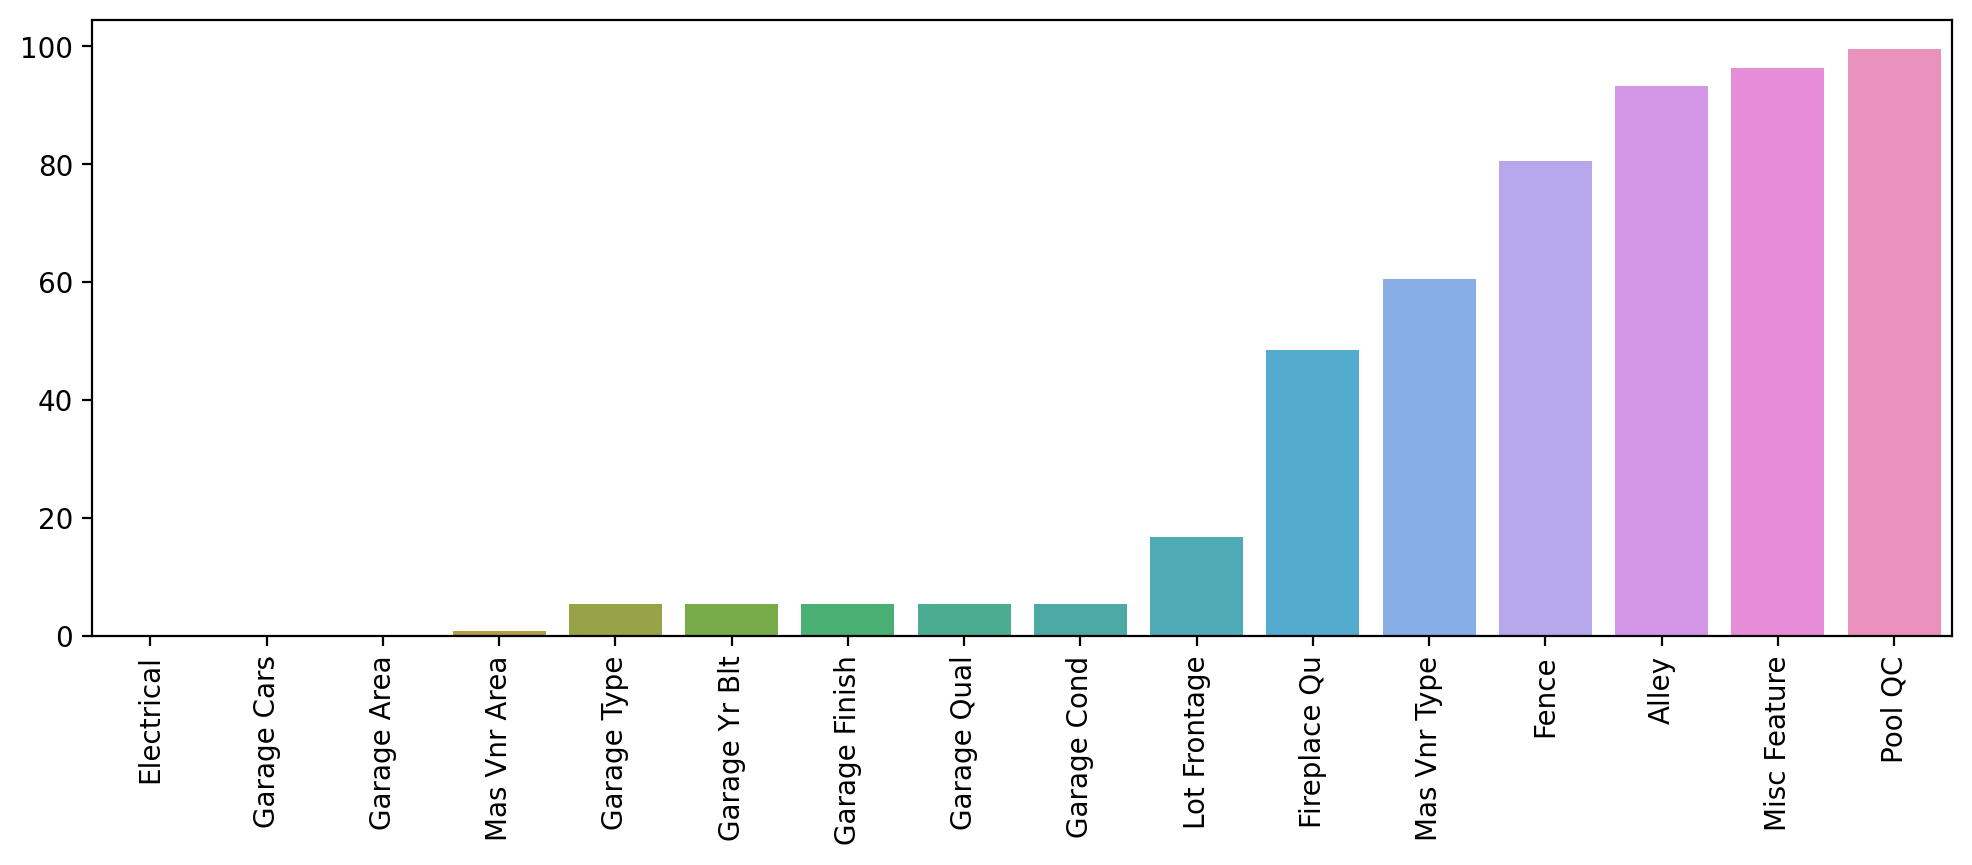

In [14]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan.values)
plt.xticks(rotation=90);

#### Dropping Rows for Eletrical and Garage Cars.

In [15]:
df = df.dropna(subset=["Electrical", "Garage Cars"])

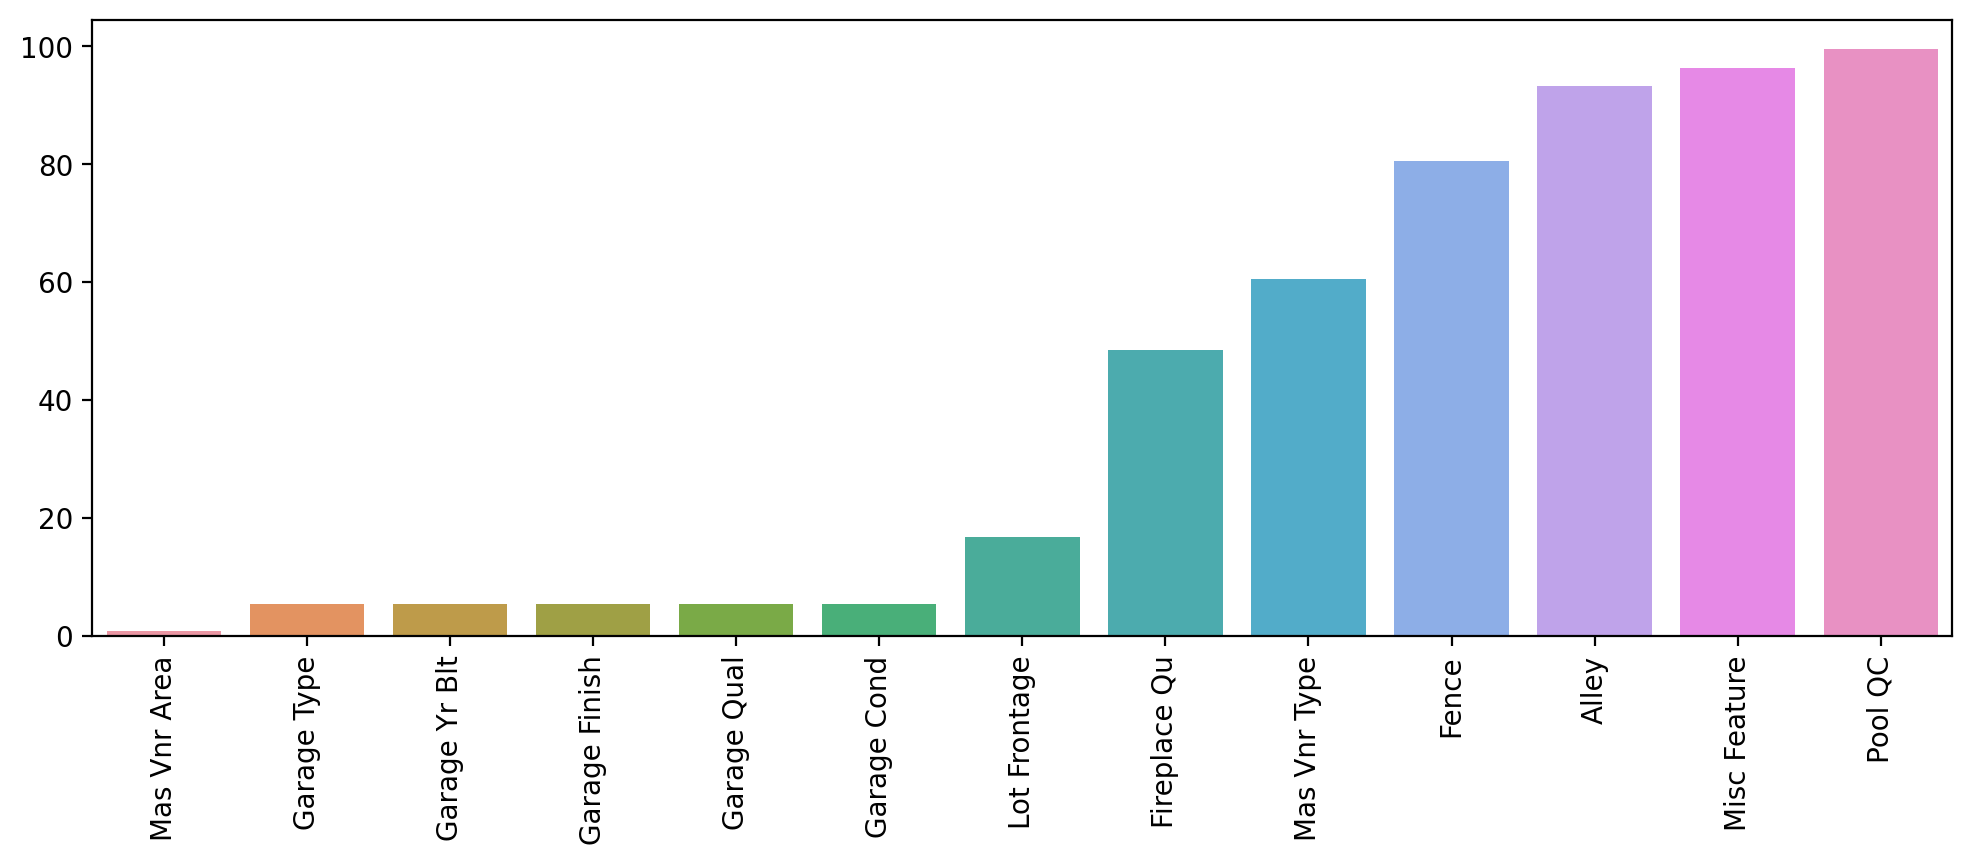

In [16]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan.values)
plt.xticks(rotation=90);

#### Replacing missing Masonry Veener Area with 0

In [17]:
df["Mas Vnr Area"].head()

0    112.0
1      0.0
2    108.0
3      0.0
4      0.0
Name: Mas Vnr Area, dtype: float64

In [18]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [19]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

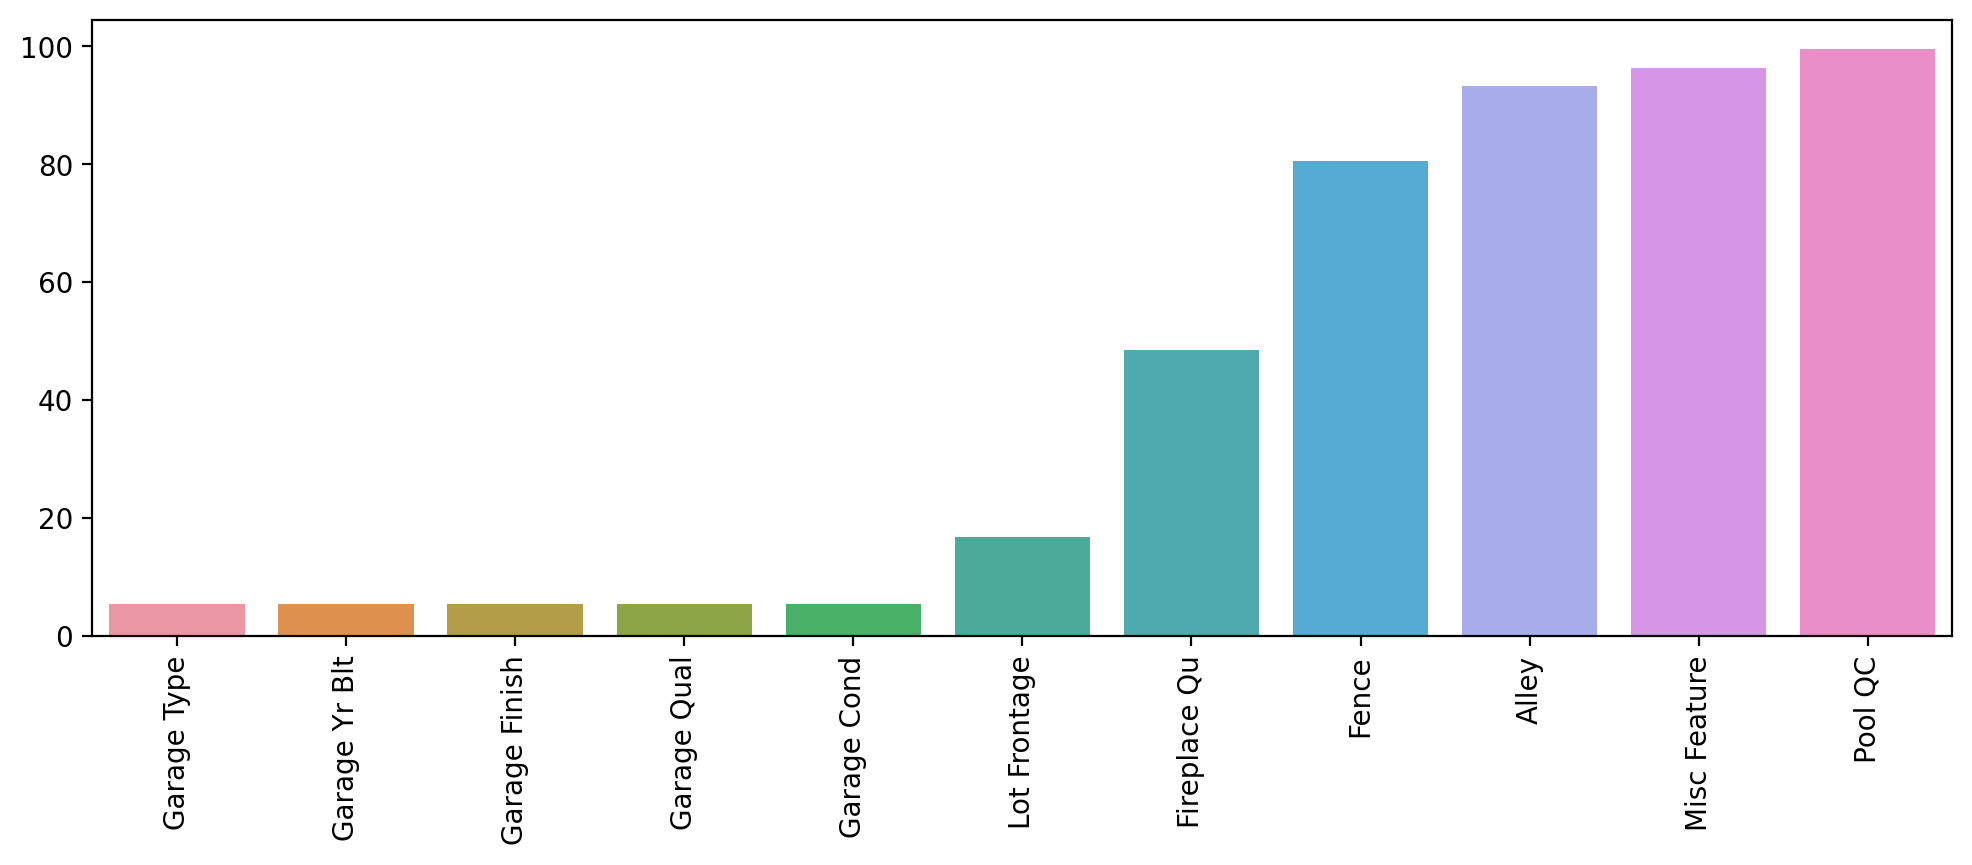

In [20]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan.values)
plt.xticks(rotation=90);

#### Missing Garage values are likely people without garages

In [21]:
df["Garage Finish"]

0       Fin
1       Unf
2       Unf
3       Fin
4       Fin
       ... 
2925    Unf
2926    Unf
2927    NaN
2928    RFn
2929    Fin
Name: Garage Finish, Length: 2928, dtype: object

In [22]:
# Replacing numerical column with 0
gar_n = ["Garage Yr Blt"]
df[gar_n] = df[gar_n].fillna(0)

In [23]:
# Replacing string columns with "none"
gar_s = ["Garage Cond", "Garage Qual", "Garage Type", "Garage Finish"]
df[gar_s] = df[gar_s].fillna("none")

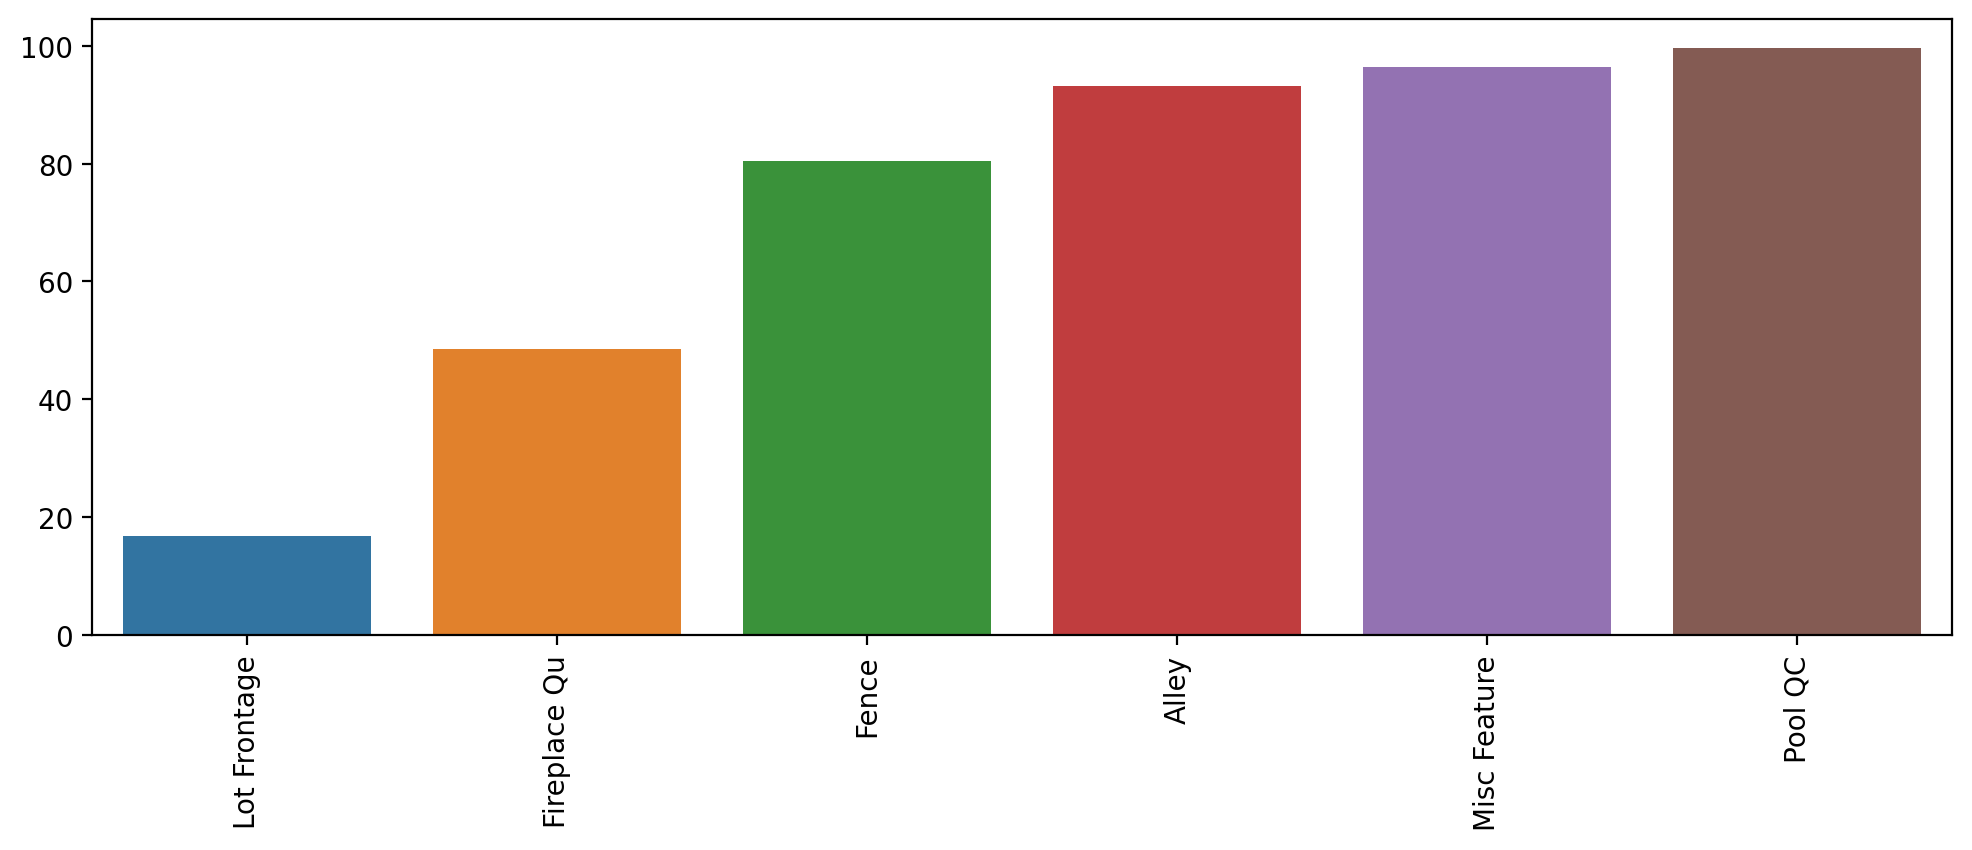

In [24]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan.values)
plt.xticks(rotation=90);

#### Removing Pool Quality, Miscellaneous Feature, Fence and Alley
As they are missing almost 100% of the data

In [25]:
df.drop(["Pool QC", "Misc Feature", "Alley", "Fence"],axis=1, inplace=True)

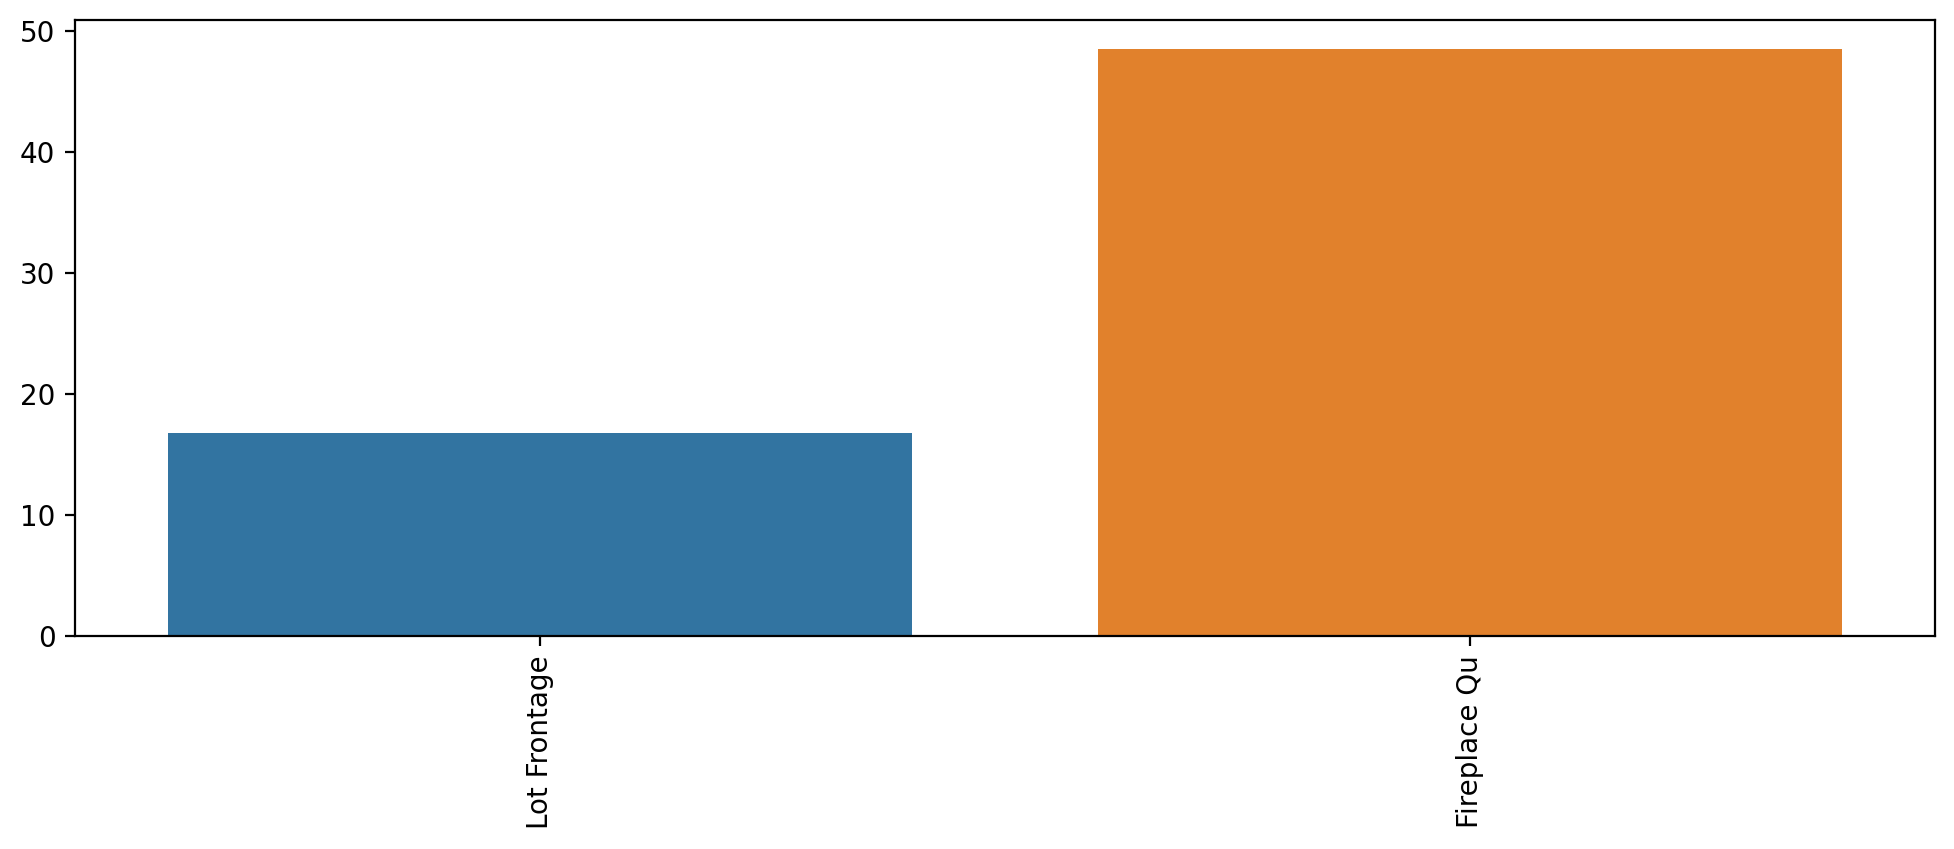

In [26]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan.values)
plt.xticks(rotation=90);

#### Replacing Fireplace Quality with "None"

In [28]:
df["Fireplace Qu"].fillna("None",inplace=True)

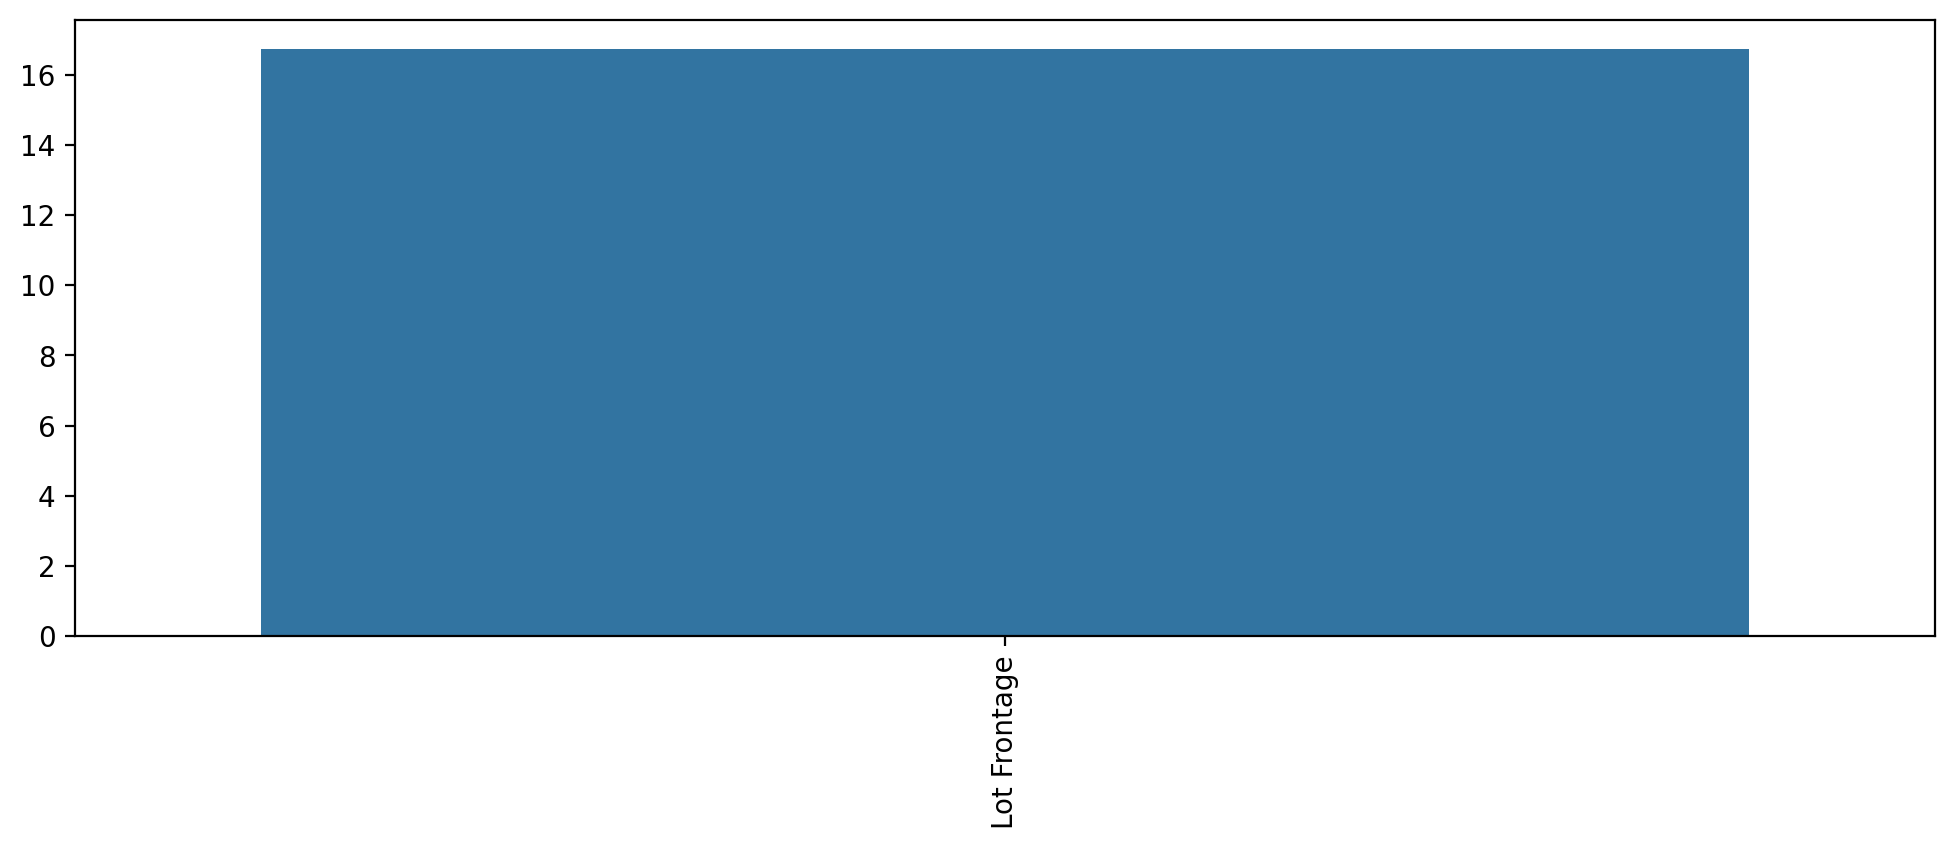

In [29]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan.values)
plt.xticks(rotation=90);

#### Filling Lot Frontage missing values with the mean of Neighborhood, assuming Lot Frontage is dependent on what Neighborhood they live.

In [37]:
df.groupby("Neighborhood")["Lot Frontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [40]:
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda x:x.fillna(x.mean()))

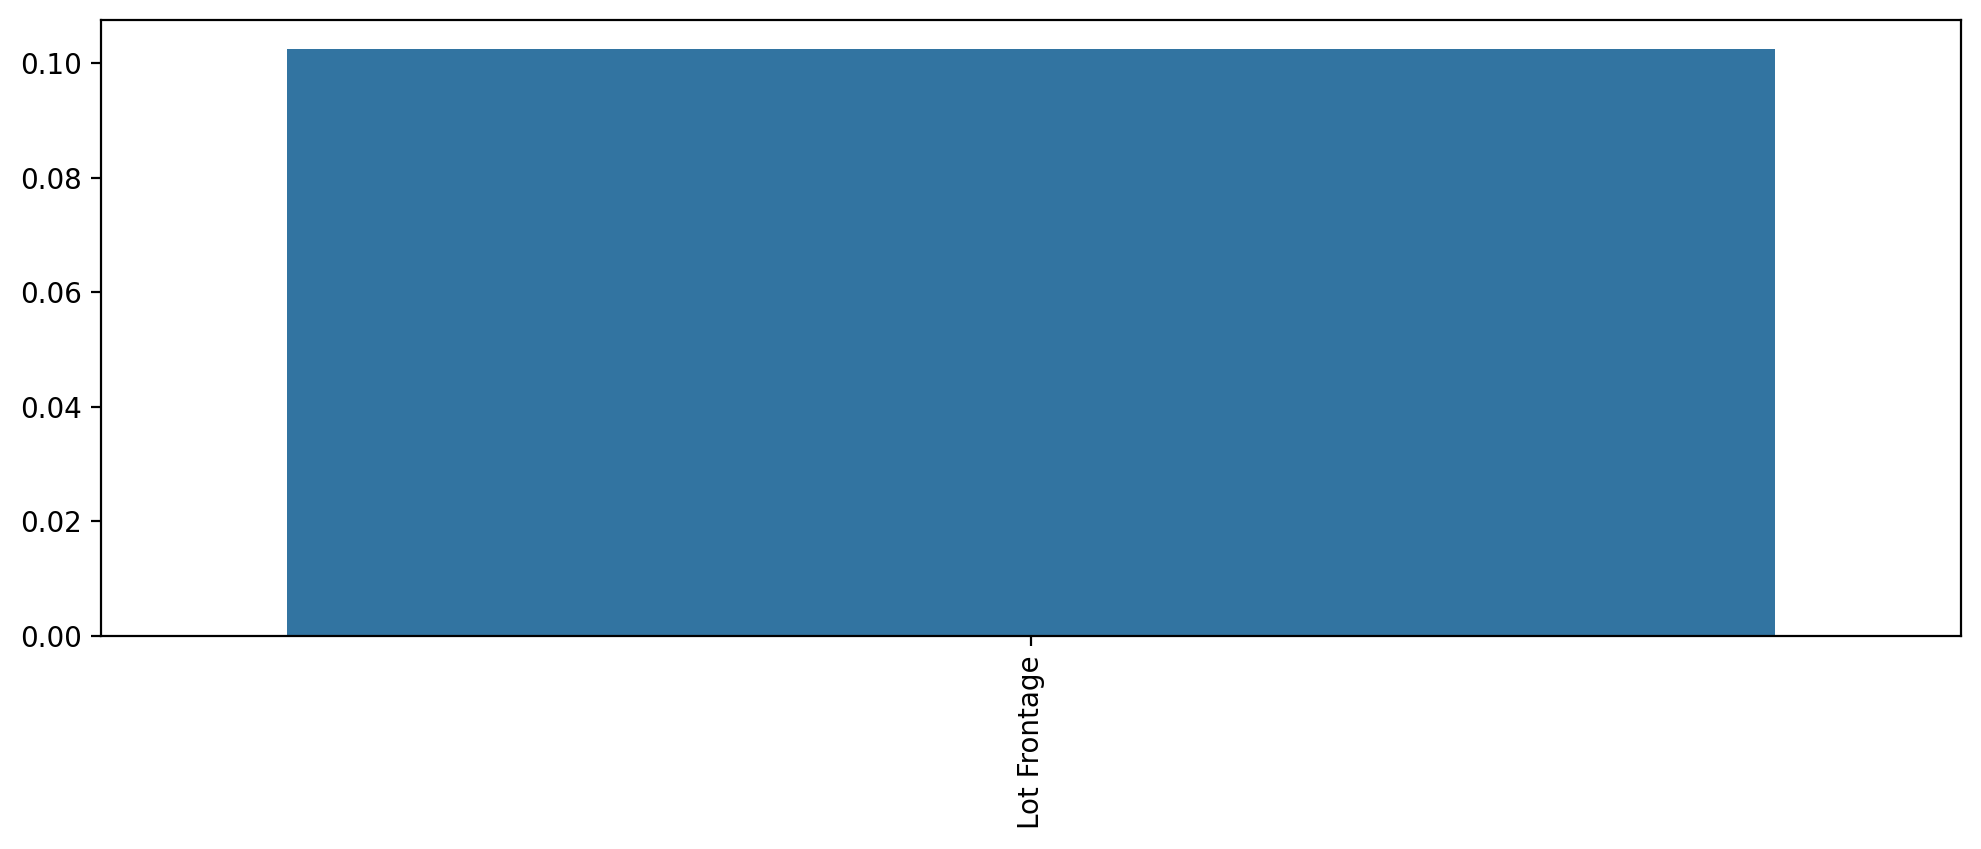

In [41]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan.values)
plt.xticks(rotation=90);

In [43]:
df["Lot Frontage"].fillna(0, inplace=True)

In [45]:
percent_nan = percent_missing(df)

In [46]:
percent_nan

Series([], dtype: float64)